In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv('/content/sample_data/darija_sentiments_analysis.csv', lineterminator='\n')

In [ ]:
data.head()

,ID,text,label
0,IQOTJAT,m3alem bourjilia w illi ma yefehmouch yelzmou ...,1
1,HY9M63D,Ya m3alllam,1
2,7SV55S2,Ma7lek! Zin ou fannena 7loua.,1
3,KDLJVZR,hhhhh ya bliiiiiiiida ya Hanen,0
4,0MAU5GY,Nikraha w ma5yebha pffff,0


In [ ]:
row = data.iloc[0]
row.text

'm3alem bourjilia w illi ma yefehmouch yelzmou ya9ra 5 ans plus le bac'

In [ ]:
len(row[1])

69

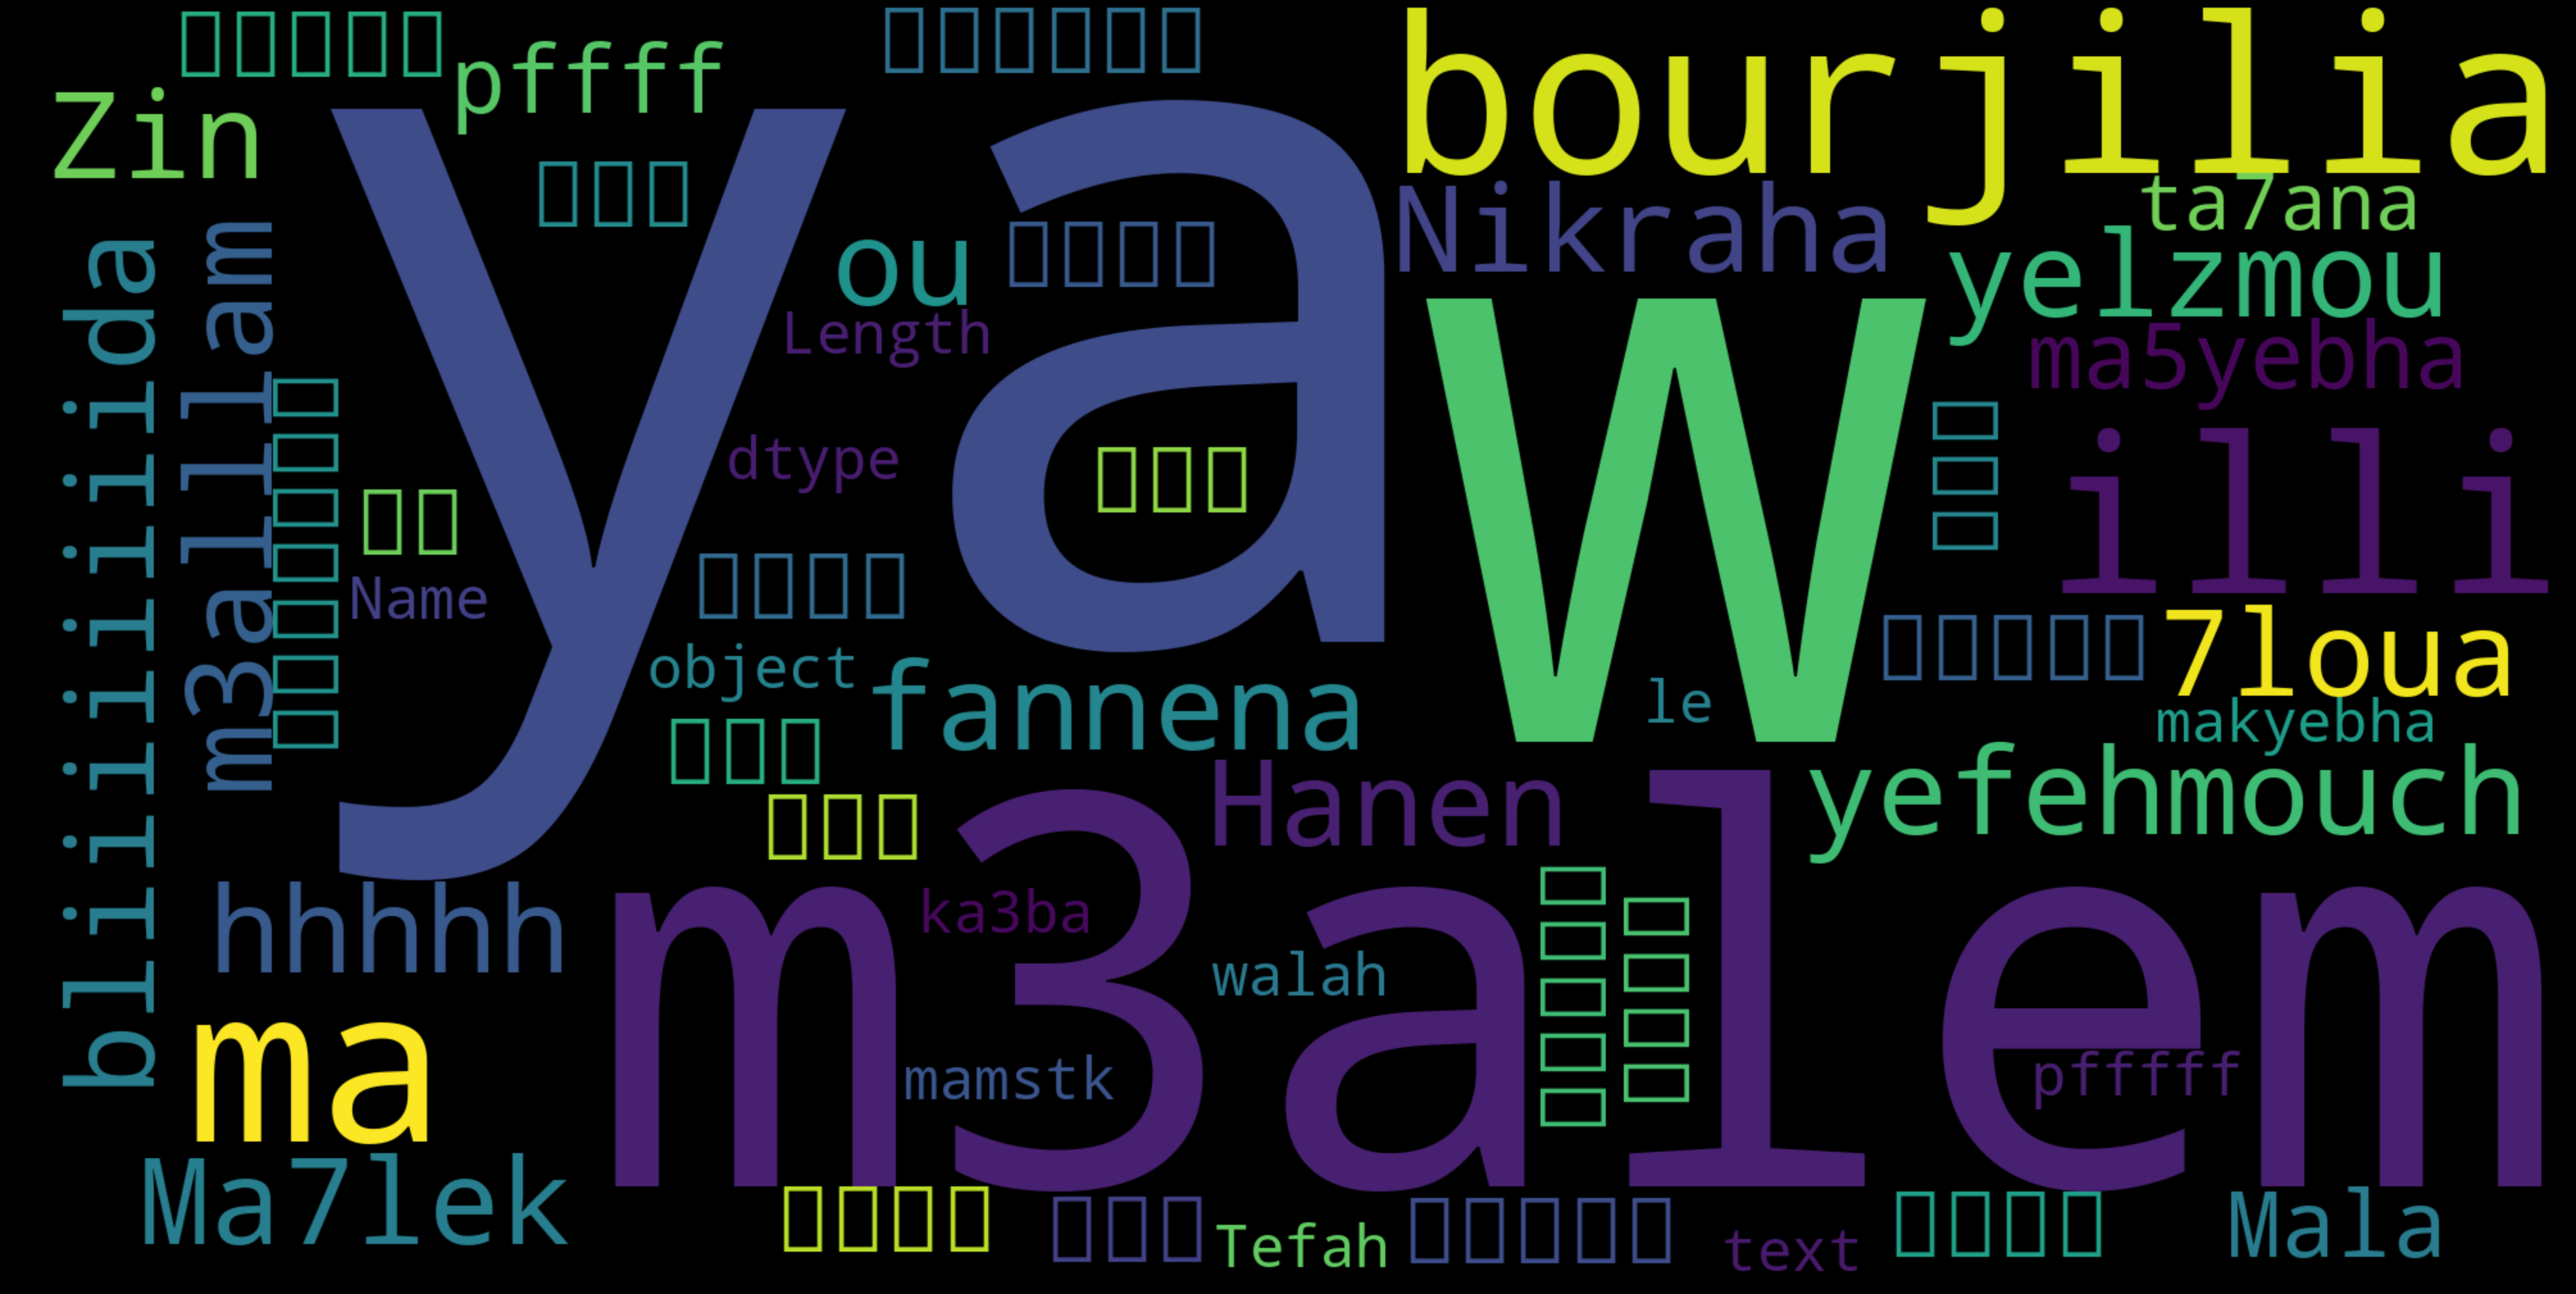

In [ ]:
from wordcloud import wordcloud, STOPWORDS
import matplotlib.pyplot as plt

STOPWORDS.add('user')
text= data.text
wordcloud=WordCloud(width=2000,height=1000, background_color ='black', stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(figsize=(40, 30), facecolor='k', edgecolor='k')

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data.text.str.lower()

0       m3alem bourjilia w illi ma yefehmouch yelzmou ...
1                                             ya m3alllam
2                           ma7lek! zin ou fannena 7loua.
3                          hhhhh ya bliiiiiiiida ya hanen
4                                nikraha w ma5yebha pffff
                              ...                        
8396    نوفل ما يجيب كان المنح وخوف ملا زبالة منال عما...
8397    نسبة مشاهدة كبيرة رغم التشويش الى صار ...برافو...
8398                                 mala ta7ana makyebha
8399                                                tefah
8400                         walah ka3ba le mamstk pfffff
Name: text, Length: 8401, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vect=TfidfVectorizer(max_features=500)

In [ ]:
listtweet=data.text.tolist()

In [ ]:
#separation de phrases
import re
ll=[]
for i in listtweet:
  ll.append(re.sub(r'[^A-Za-z]+',' ',str(i)))

In [ ]:
ll

In [ ]:
#separation de mots
x= vect.fit_transform(ll)
df = pd.DataFrame(x.toarray(), columns=vect.get_feature_names_out())

#df=vect.get_feature_names_out()
#df= pd.DataFrame(x.toarray(), columns=vect.get_features_names_out())



In [ ]:
df

,aa,ach,ad,ada,adech,adi,ah,aha,ahla,ahmed,...,zayed,zebla,zeda,zeyed,zid,zin,zina,zinek,zinou,zouz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.633249,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
ind=[]
col=[]
for i in df.columns:
    if len(i)<=2:
        ind.append(1)
    else:
        ind.append(0)
for i in range(len(ind)):
    if ind[i]==1:
        col.append(i)
df=df.drop(df.columns[[col]], axis = 1)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:5069: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [ ]:
df

,ach,ada,adech,adi,aha,ahla,ahmed,ahsen,aja,akber,...,zayed,zebla,zeda,zeyed,zid,zin,zina,zinek,zinou,zouz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.633249,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
'''from sklearn.model_selection import train_test_split

#X=data['text']
#y=data['label']
df['label']= data['label']

train=df.iloc[:-100]
x_train= train.drop('label',axis=1)
y_train= train['label']

test= df.iloc[-100:]

x_test= test.drop('label',axis=1)
y_test= test['label']
'''

"from sklearn.model_selection import train_test_split\n\n#X=data['text']\n#y=data['label']\ndf['label']= data['label']\n\ntrain=df.iloc[:-100]\nx_train= train.drop('label',axis=1)\ny_train= train['label']\n\ntest= df.iloc[-100:]\n\nx_test= test.drop('label',axis=1)\ny_test= test['label']\n"

In [ ]:
df['label']=data['label']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Split data into features and target
Train=df.iloc[:-100]
Test= df.iloc[-100:]
X_train = Train.drop('label', axis=1)
y_train = Train["label"]
X_test=Test.drop("label", axis=1)
Y_test=Test["label"]


# Create random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on training data
rf.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = rf.predict(X_test)


# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.76
